# Unsupervised Learning: Trade&Ahead

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Security: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from scipy.stats import zscore

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [2]:
# importing the dataset
data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [3]:
# making a copy
df = data.copy()

<IPython.core.display.Javascript object>

In [4]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns")

The dataset has 340 rows and 15 columns


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

* `Ticker Sybol`, `Security`, `GICS Sector` and `GICS Sub Indutry` columns are object data type, as we can expect from the dictionary description. All the other columns are numerical type (float or intiger).

In [6]:
# checking for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the dataset.

In [7]:
# checking for duplicate values in the data
print(f"There are {df.duplicated().sum()} duplicated values in the dataset")

There are 0 duplicated values in the dataset


<IPython.core.display.Javascript object>

In [8]:
# Checking the first 5 rows of the dataset
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [9]:
# Checking the last 5 rows of the dataset
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


<IPython.core.display.Javascript object>

* The dataset looks to be sorted alphabetically by Ticker Symbol or Company name

## Exploratory Data Analysis (EDA)

In [10]:
df.describe(include="all").round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.86,98.06,4.5,38.55,59.7,92.88,1274.95
Price Change,340.0,NaN,NaN,NaN,4.08,12.01,-47.13,-0.94,4.82,10.7,55.05
Volatility,340.0,NaN,NaN,NaN,1.53,0.59,0.73,1.13,1.39,1.7,4.58
ROE,340.0,NaN,NaN,NaN,39.6,96.55,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.02,90.42,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.59,1946365312.18,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

* As expected since it's an identifier, `Tycker Symbol` has 340 unique values. `Security` has also unique values because it's the actual name of the company.
* Companies belong to 11 economic sectors (`GICS Sector`). "Industral' is the sector with more entries (53 out of 340).
* There are 104 sub-industry groups (`GICS Sub Industry`). "Oil & Gas Exploration & Production" is the subsector with more records (16 out of 340).
* The `Current Price` of the stocks varies from 4.5 to 1274.95 dollars. The median value (59.7) is lower than the mean (80.86), meaning the current price is right skewed. There are some stocks with current prices significantly higher than others.
* `Price Change` present negative values, the minimum is -47.13. There are some stocks which price has decreased in the last 13 weeks. Overall, stocks' price has increased 4.82% in avarage.
* `Volatility` As an avarage, stocks price has changed 4.08 standard deviations.
* `ROE` the financial perfomance among different stocks is uneven, with a range from 1 to 917, and a mean of 39.6.
* `Cash Ratio` varies from 0 to 958, meaning some companies have a high reservs of cash in relation to its liabilities, and some others don't.
* `Net Cash Flow` As expected the cash flow range is really wide. Some companies experienced cash outflows of -11208 millon, and other companies got an inflow of +20764 millon dollars. It's interesting that the 25 quartile presents a negative number, meaning 1/4 of the companies had a negative cash flow.
* `Net Income` In this case, although the min net income is negative, the 25 quartile presents a positive number. Again, the range of values is extreamly wide. The companies' median revenew is 707 million.
* `Earnings Per Share` The avarage earning per share is 2.78 dollars. There are also negative values, the min is -61.2
* `Estimated Shares Outstanding` The companies' stock currently held by all shareholders varies from 27 millon to 6159 milllon.
* `P/E Ratio` The ratio of companies' current stock price to the arnings per share is in avarage 32.61, and the mean 20.82.
* `P/B Ratio` The retio of of the companies' stock price per share by its book value per share is in avarage -1.72, and the mean -1.07.

In [11]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Univariate Analysis

**GICS Sector**

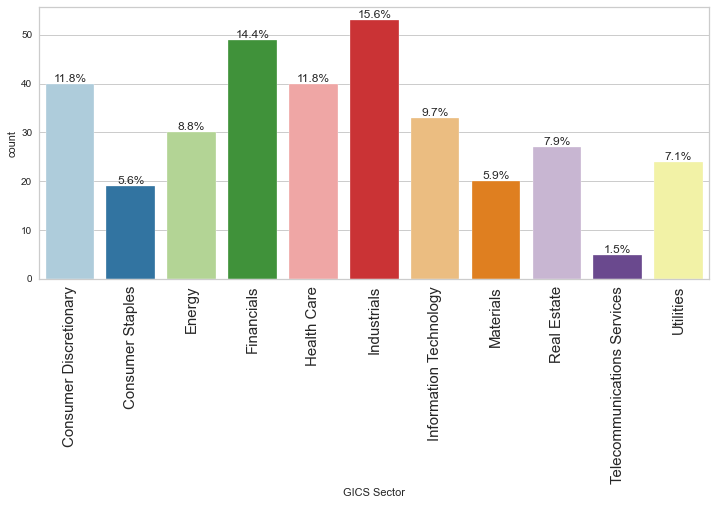

<IPython.core.display.Javascript object>

In [13]:
labeled_barplot(df, "GICS Sector", perc=True)

* The Industrial sector represents 15.6% of the observations in out dataset. Followed by the Financial sector with 14.4% and the Consumer Discretionary and Health Care sectors with 11.8% each.

**GICS Sub Industry**

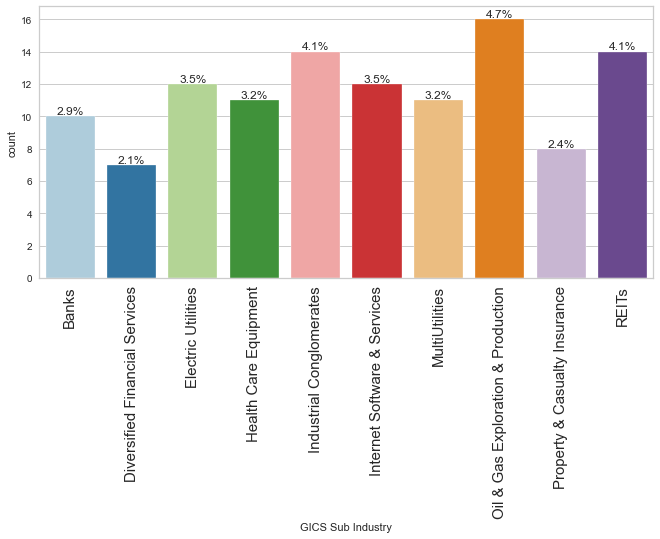

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(df, "GICS Sub Industry", perc=True, n=10)

* The princial Sub Industries are Oil and Gas Exportation and Production (4.7% of the observations), Industrial Conflomerates (4.1%) and REITs (4.1%).

**Current Price**

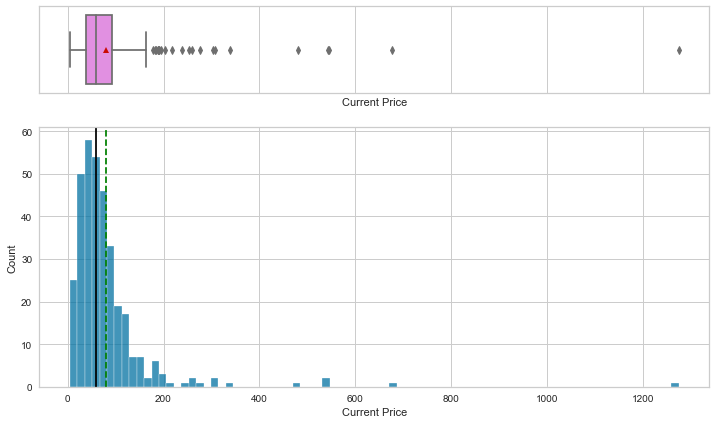

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(df, "Current Price", figsize=(12, 7), kde=False, bins=None)

* The current stock price presents a right skewed distribution. Most of the observations are between 0 and ~100, but there are some stocks with a current price higher than 200 dollars, and at least one over 1200 dollars.

**Price Change**

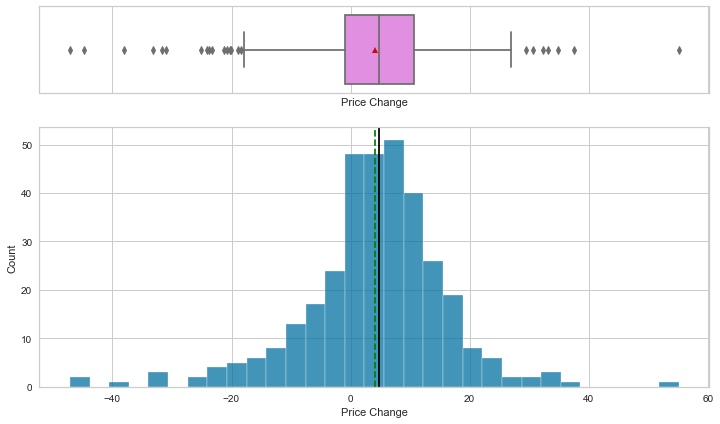

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "Price Change", figsize=(12, 7), kde=False, bins=None)

* Price change looks normally distributed, and presents outliers on both ends.

**Volatility**

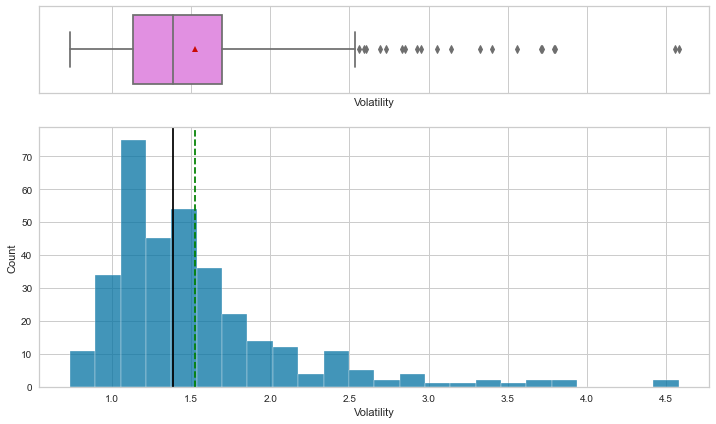

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(df, "Volatility", figsize=(12, 7), kde=False, bins=None)

* Volatility is right skewed, with many outliers on the right side of the distribution. Median and mean are not that far apart, the mean is higher than the median but the mode is lower.

**ROE**

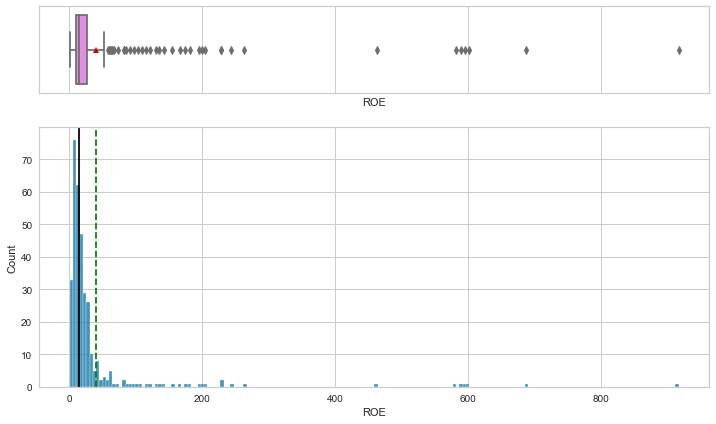

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "ROE", figsize=(12, 7), kde=False, bins=None)

* ROE as we have observed before is really right skewed. There is a big group of outliers between the upper extrem value and 200, and some other outliers after 400. Therefore there are a few companies performing way better than the rest.

**Cash Ratio**

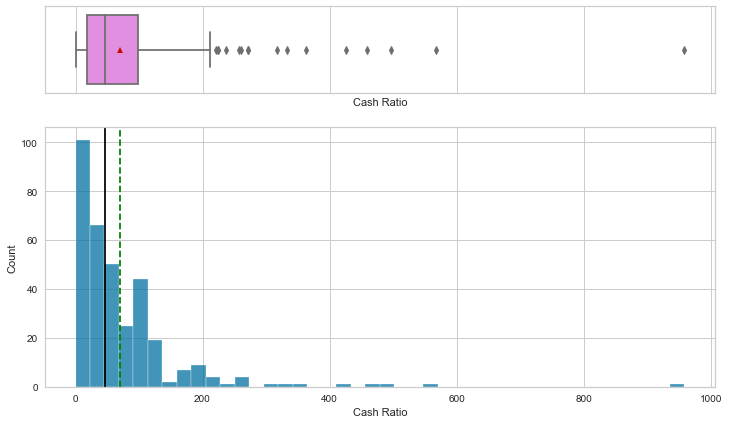

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(df, "Cash Ratio", figsize=(12, 7), kde=False, bins=None)

* Cash ratio is also right skewed, showing again there are a few companies with an overall better performance than the others. Most of the companies have a cash ratio higher than 0 but lower than 100. There is also a small group of companies around 200, and some outliers after 200. There is at least one company with a cash ratio higher than 900.

**Net Cash Flow- Expressed in Millions**

In [20]:
df["Net Cash Flow_MM"] = df["Net Cash Flow"] / 1000000

<IPython.core.display.Javascript object>

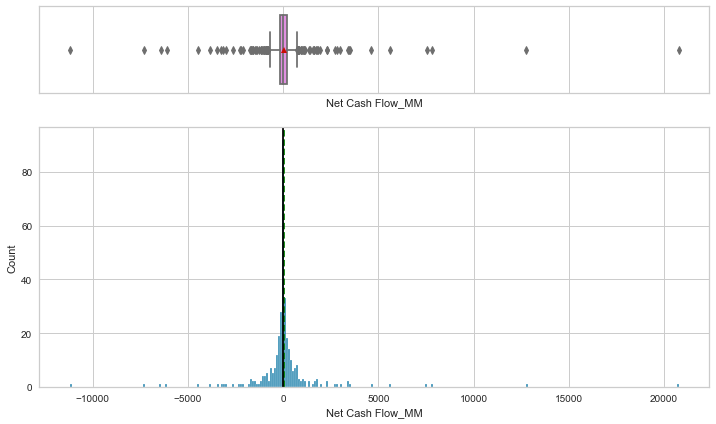

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "Net Cash Flow_MM", figsize=(12, 7), kde=False, bins=None)

* Net Cash flow looks normally distributed, most of the values are concentrated around 0 (the center of the distribution), but there are many outliers on both ends of the distribution. There are cash flows of -10000 and + 20000 million. 

**Net Income- Expressed in Milions-**

In [22]:
df["Net Income_MM"] = df["Net Income"] / 1000000

<IPython.core.display.Javascript object>

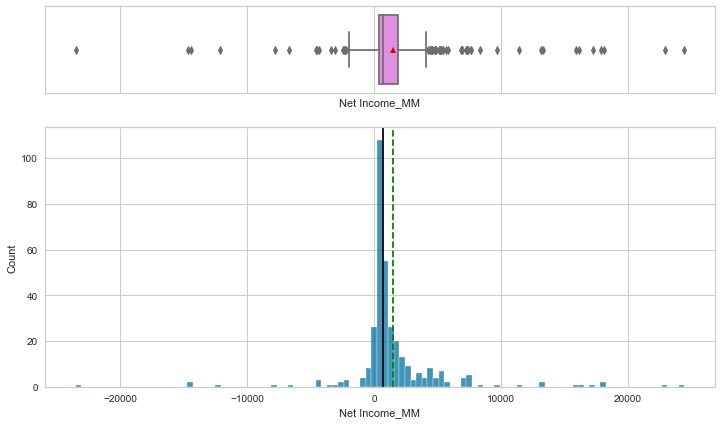

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "Net Income_MM", figsize=(12, 7), kde=False, bins=None)

* Net income also looks kind of normally distributed, with outliers on bothe ends. There are more outliers on the right side of the distribution, therefore the mean is higher than the median.

In [24]:
# Dropping the two variables created for plotting purposes only
df.drop(columns=["Net Cash Flow_MM", "Net Income_MM"], inplace=True)

<IPython.core.display.Javascript object>

**Earnings Per Share**

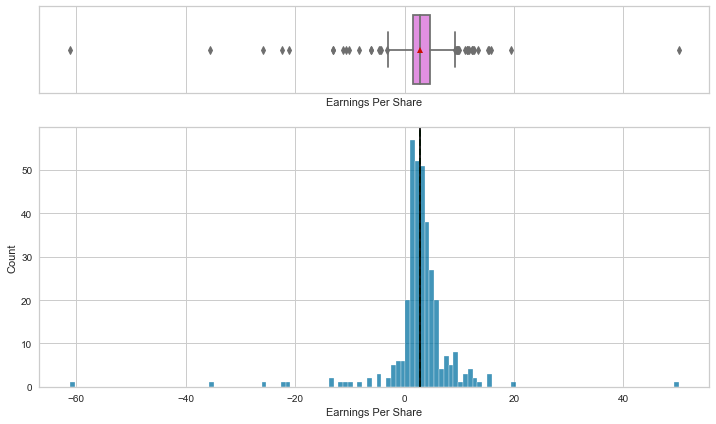

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "Earnings Per Share", figsize=(12, 7), kde=False, bins=None)

* In earnings per share mean and median are the same, but the mode is on the left. The distribution looks normal but the bell is narrow, tall in the cententer with short tails, and has outliers on both sides.

**Estimated Shares Outstanding**

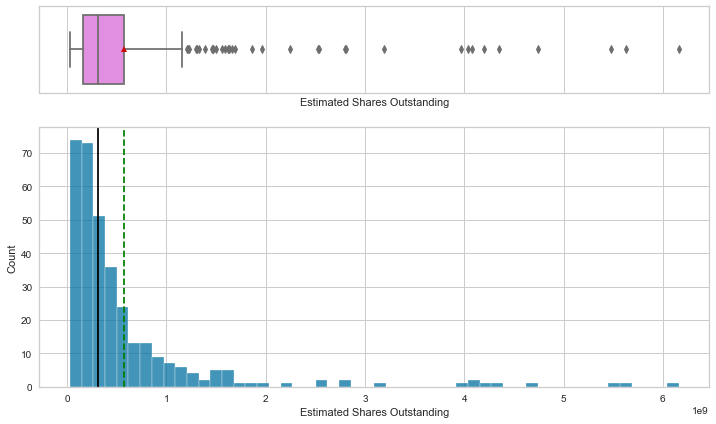

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(
    df, "Estimated Shares Outstanding", figsize=(12, 7), kde=False, bins=None
)

* Estimated Shares Outstanding is right skewed. There are no outliers on the left side of the distribution.

**P/E Ratio**

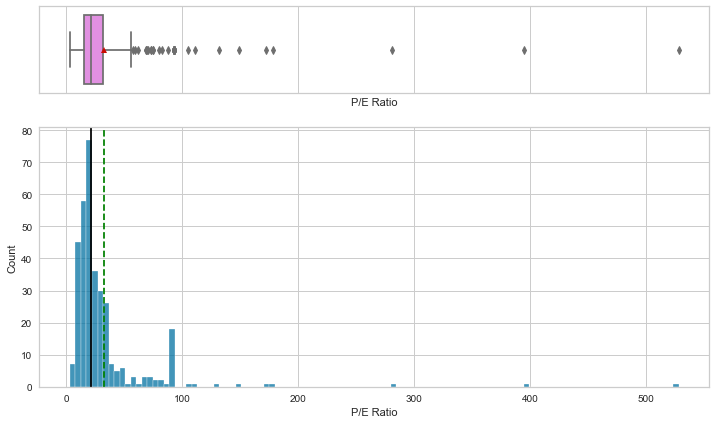

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "P/E Ratio", figsize=(12, 7), kde=False, bins=None)

* P/E is also right sweked, with no outliers on the left. 

**P/B Ratio**

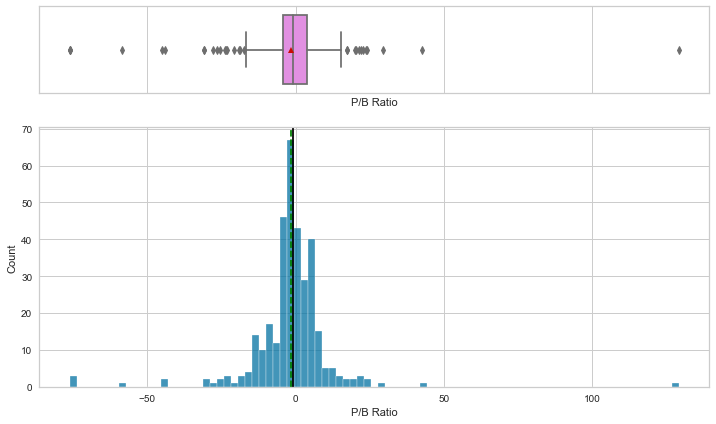

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "P/B Ratio", figsize=(12, 7), kde=False, bins=None)

* P/B Ratio looks normally distributed, with outliers on both sides. Most of the outliers are close to the extremes of the box plot, but there are a few really far. Mean, median and mode are almost the same.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

1. What does the distribution of stock prices look like?

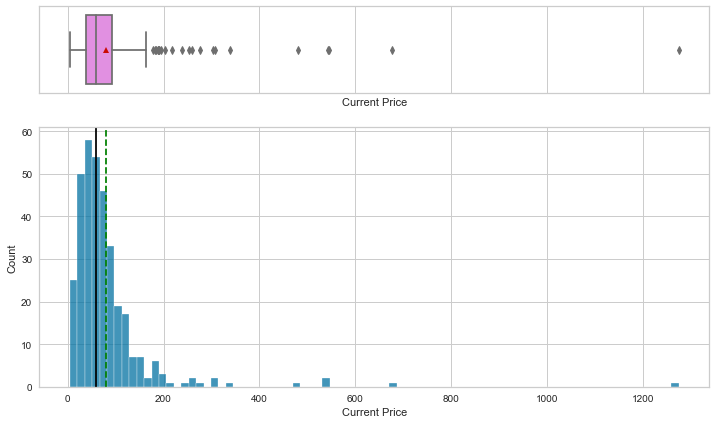

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "Current Price", figsize=(12, 7), kde=False, bins=None)

* The distribution of prices is really right skewed. As we are talking about the current price of the stock, there are no negative values, but some of them are close to 0. Most of the stocks' price is between 0 and 100, but there are some stock that reach a price over 1200. It is clear that there are a few companies performing way better than others, or at least with an stock price way higher.

2. The stocks of which economic sector have seen the maximum price increase on average?

In [30]:
df.groupby("GICS Sector")["Price Change"].mean().sort_values(ascending=False)

GICS Sector
Health Care                     9.585652
Consumer Staples                8.684750
Information Technology          7.217476
Telecommunications Services     6.956980
Real Estate                     6.205548
Consumer Discretionary          5.846093
Materials                       5.589738
Financials                      3.865406
Industrials                     2.833127
Utilities                       0.803657
Energy                        -10.228289
Name: Price Change, dtype: float64

<IPython.core.display.Javascript object>

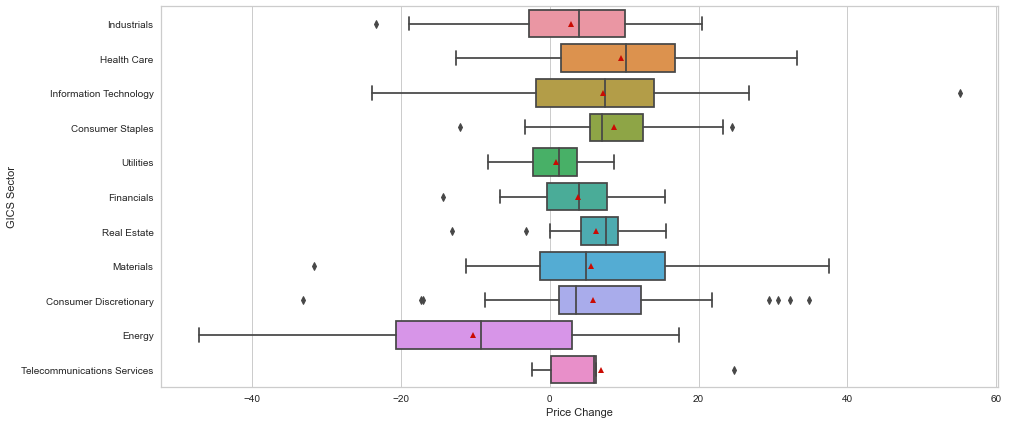

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, y="GICS Sector", x="Price Change", showmeans=True, orient="h")
plt.show()

* Health care sector presents the higher price increase on avarage. If would be interesting to know the year of the dataset. If it is from the last few years, the fact that health care presents the highest price increase makes sense. It is also interesting that helath care presents no outliers, so these price increase was even in the sector. We can also see that Information Technoloby has one outlier on the right with a price increase considerably higher than all the others.

3. How are the different variables correlated with each other?

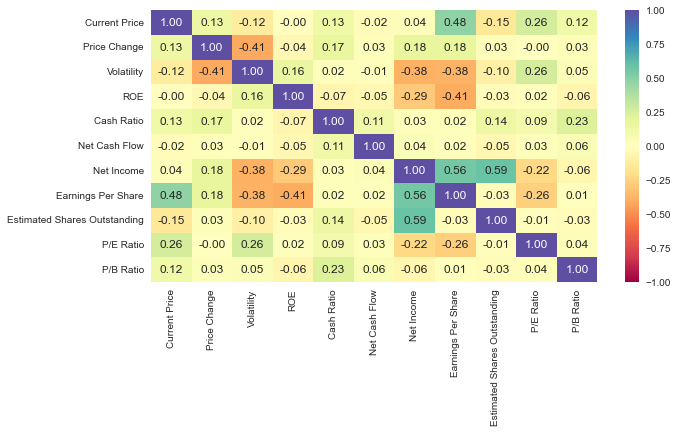

<IPython.core.display.Javascript object>

In [32]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The highest correlated variables are Estimated Shares Outstanding and Net Income (0.59).
* Net Income is also correlated with Earning Per Share (0.56)
* Earning Per Share is also correlated with the stock current Price (0.48)
* There are also some negative correlations, such as Volatility an Price change (-0.41), which makes total sense.

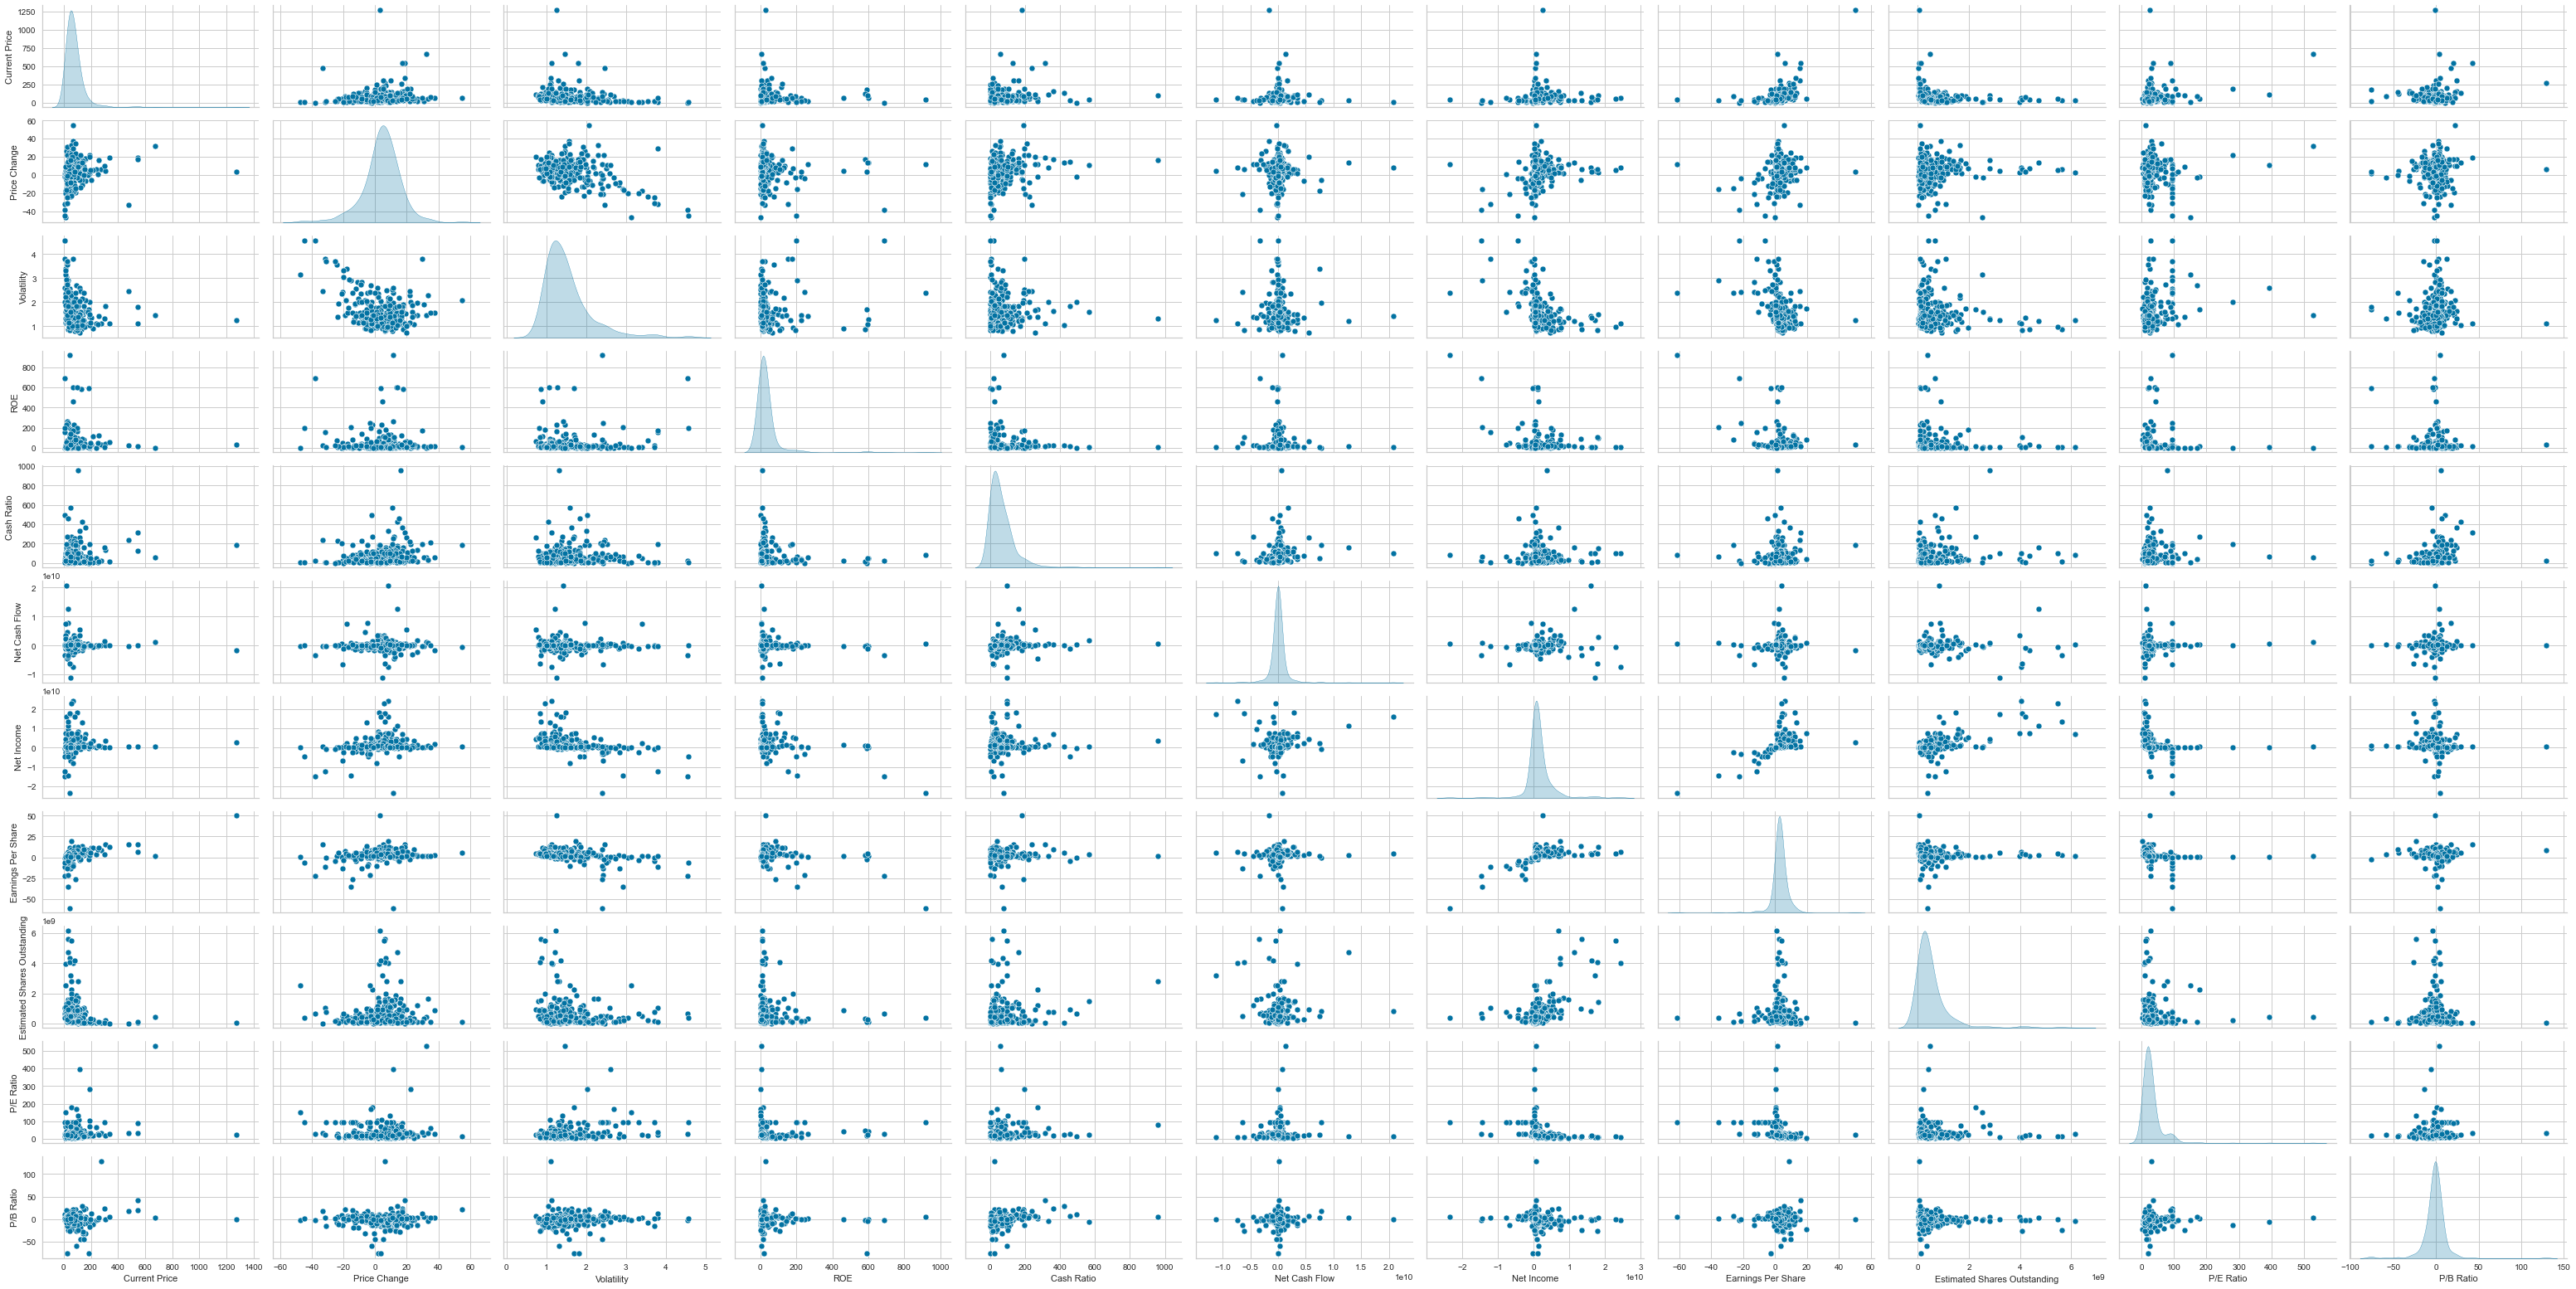

<IPython.core.display.Javascript object>

In [33]:
sns.pairplot(df[cols_list], height=2, aspect=2, diag_kind="kde")

* The pair plot can help us to see if we can identify some clusters, and how many. But this is only a two dimensions plot, therefore it's not always possible to see them.
* It is difficult to see well defined clusters. In most of the pairs, it looks like there is a big cluster surrounded by other points that are not grouped together.

4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

In [34]:
df.groupby("GICS Sector")["Cash Ratio"].mean().sort_values(ascending=False)

GICS Sector
Information Technology         149.818182
Telecommunications Services    117.000000
Health Care                    103.775000
Financials                      98.591837
Consumer Staples                70.947368
Energy                          51.133333
Real Estate                     50.111111
Consumer Discretionary          49.575000
Materials                       41.700000
Industrials                     36.188679
Utilities                       13.625000
Name: Cash Ratio, dtype: float64

<IPython.core.display.Javascript object>

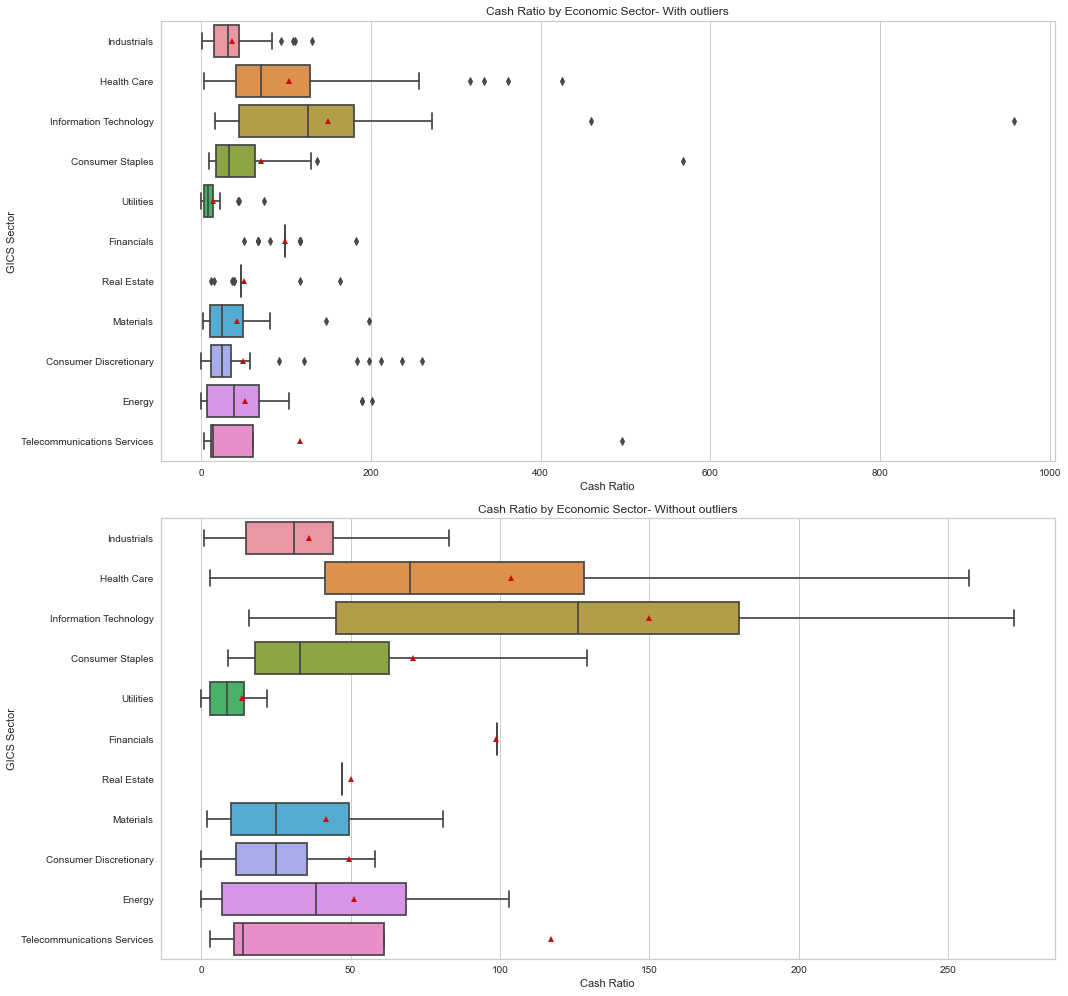

<IPython.core.display.Javascript object>

In [35]:
fig, axs = plt.subplots(2, figsize=(15, 14))
axs[0].set_title("Cash Ratio by Economic Sector- With outliers")
sns.boxplot(
    data=df, y="GICS Sector", x="Cash Ratio", showmeans=True, orient="h", ax=axs[0],
)

axs[1].set_title("Cash Ratio by Economic Sector- Without outliers")
sns.boxplot(
    data=df,
    y="GICS Sector",
    x="Cash Ratio",
    showmeans=True,
    showfliers=False,
    orient="h",
    ax=axs[1],
)
plt.tight_layout()
plt.show()

* There are three economic sectors that preset a higher cash ratio: Infomation Technology, Telecommunications Services, and Health Care.
* If we analyze the box plot, we can see that Telecommunications Services has a high avarage cash ratio, but this is the product of an outlier on the right end of the tale that makes the avarage to be higher.

5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [36]:
df.groupby("GICS Sector")["P/E Ratio"].mean().sort_values(ascending=False)

GICS Sector
Energy                         72.897709
Information Technology         43.782546
Real Estate                    43.065585
Health Care                    41.135272
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Materials                      24.585352
Utilities                      18.719412
Industrials                    18.259380
Financials                     16.023151
Telecommunications Services    12.222578
Name: P/E Ratio, dtype: float64

<IPython.core.display.Javascript object>

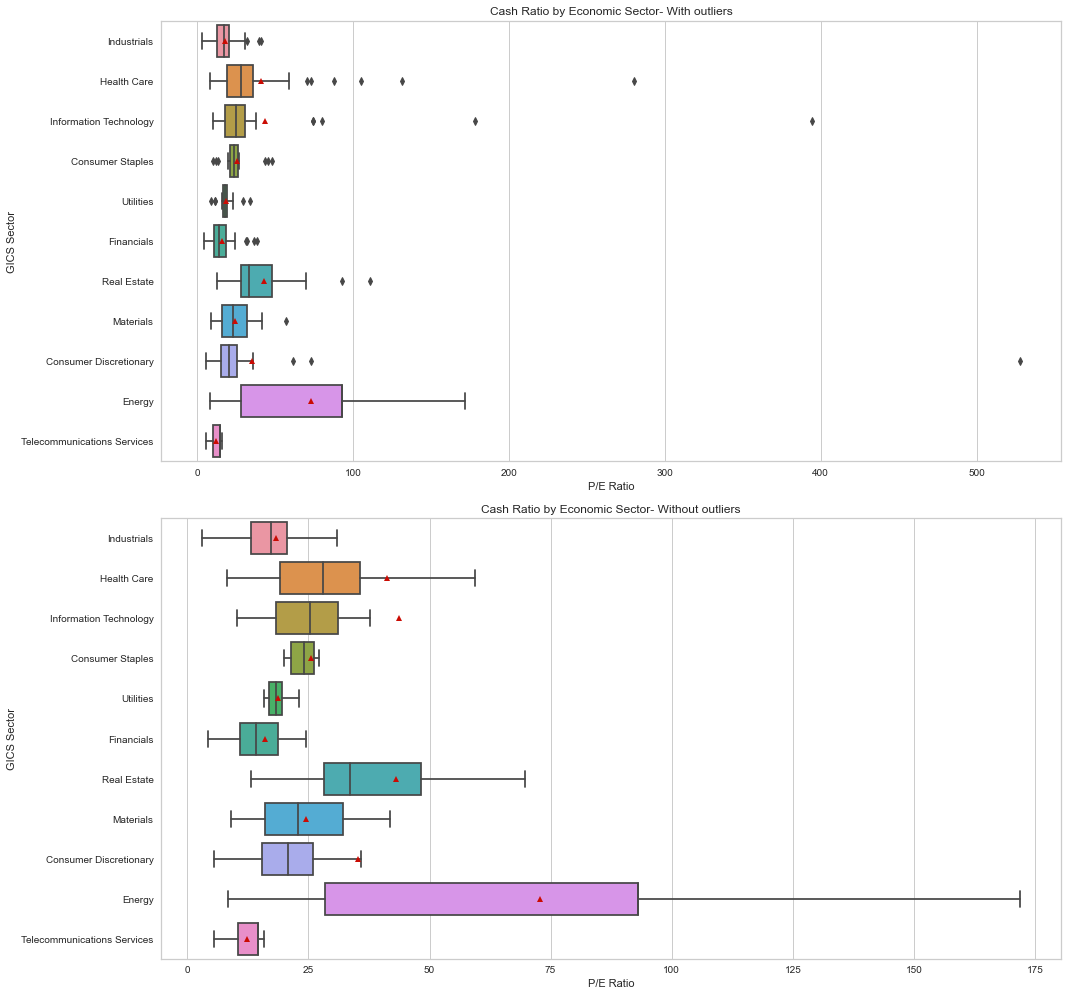

<IPython.core.display.Javascript object>

In [37]:
fig, axs = plt.subplots(2, figsize=(15, 14))
axs[0].set_title("Cash Ratio by Economic Sector- With outliers")
sns.boxplot(
    data=df, y="GICS Sector", x="P/E Ratio", showmeans=True, orient="h", ax=axs[0],
)

axs[1].set_title("Cash Ratio by Economic Sector- Without outliers")
sns.boxplot(
    data=df,
    y="GICS Sector",
    x="P/E Ratio",
    showmeans=True,
    showfliers=False,
    orient="h",
    ax=axs[1],
)
plt.tight_layout()
plt.show()

* The Energy sector has the highest mean P/E Ratio, and doesn't have outliers. 
* Investor are willing to invest in this sector the highest amount of money, there are no companies where investors are willing to put way less or more money. The sector looks even.

## Data Preprocessing

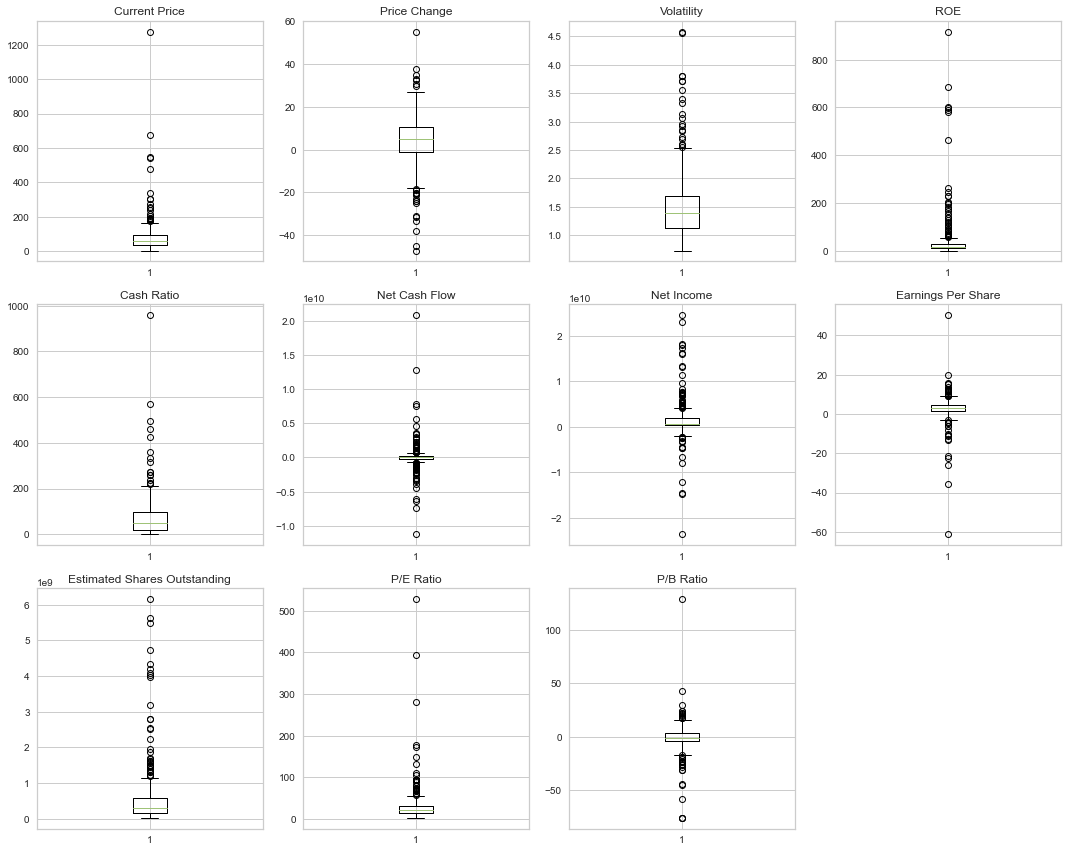

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(cols_list):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Ther are outliers in all the variables, but they don't represent a mistake or an exception but the usual characteristics of an uneven stock market.

* Scaling the data

In [39]:
# We'll use zscore to scale the data
dfScaled = df[cols_list].apply(zscore)
dfScaled.head(10)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
5,-0.451251,-1.342556,-0.016049,-0.307006,-0.232849,-0.125823,0.090133,0.032432,0.048977,-0.459427,0.660752
6,1.998837,0.176091,-0.692132,-0.099549,-0.498664,0.018187,-0.228206,0.932390,-0.603923,-0.035502,9.377562
7,-0.384353,-0.158797,-0.679931,-0.317379,-0.620496,0.119096,-0.218177,-0.026856,-0.393572,-0.360984,0.071614
8,-0.230744,-0.142338,-0.774192,-0.296633,-0.675874,-0.021424,0.141806,0.053714,-0.183672,-0.319668,-0.093530
9,-0.214096,-0.087667,-0.808359,-0.265515,0.320933,-0.187053,0.263986,0.471769,-0.173153,-0.506408,-0.011879


<IPython.core.display.Javascript object>

* Not that all the data is in the same scale, we can start with the cluster analysis.

## K-means Clustering

* We need first to find out the best number of clusters

In [40]:
# Creating a copy of the scaled dataframe to use for k-means clustering
dfScaled_Kmeans = dfScaled.copy()

<IPython.core.display.Javascript object>

**Elbow Method - Euclidean Distance-**

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


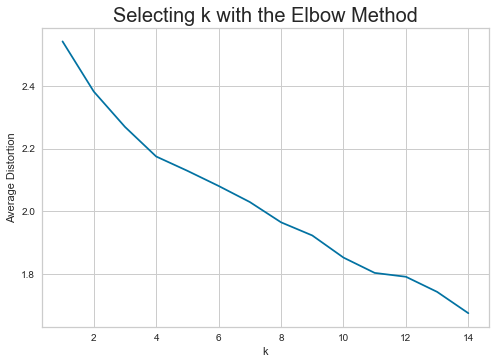

<IPython.core.display.Javascript object>

In [41]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(dfScaled_Kmeans)
    prediction = model.predict(dfScaled_Kmeans)
    distortion = (
        sum(np.min(cdist(dfScaled_Kmeans, model.cluster_centers_, "euclidean"), axis=1))
        / dfScaled_Kmeans.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

* It is difficult to see an elbow in the plot. Maybe at 4. Since we know there are many outliers we'll try using Mahalanobis Distance instead.

**Elbow Method -Mahalanobis Distance-**

Number of Clusters: 1 	Average Distortion: 2.6013997493563674
Number of Clusters: 2 	Average Distortion: 2.51325071611578
Number of Clusters: 3 	Average Distortion: 2.439204822860131
Number of Clusters: 4 	Average Distortion: 2.3690965643922186
Number of Clusters: 5 	Average Distortion: 2.324313893326158
Number of Clusters: 6 	Average Distortion: 2.284185160559951
Number of Clusters: 7 	Average Distortion: 2.2205334188687025
Number of Clusters: 8 	Average Distortion: 2.1492600832554687
Number of Clusters: 9 	Average Distortion: 2.0843918387430667
Number of Clusters: 10 	Average Distortion: 1.9935701025835442
Number of Clusters: 11 	Average Distortion: 1.9690341110837801
Number of Clusters: 12 	Average Distortion: 1.9226536853363356
Number of Clusters: 13 	Average Distortion: 1.8840517634465874
Number of Clusters: 14 	Average Distortion: 1.8067289640315638


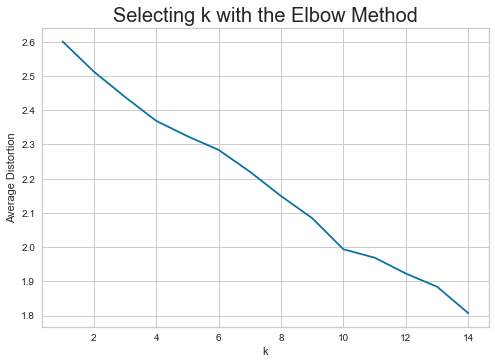

<IPython.core.display.Javascript object>

In [42]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(dfScaled_Kmeans)
    prediction = model.predict(dfScaled_Kmeans)
    distortion = (
        sum(
            np.min(
                cdist(dfScaled_Kmeans, model.cluster_centers_, "mahalanobis"), axis=1
            )
        )
        / dfScaled_Kmeans.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

* It doesn't help much, there is a tiny elbow at 4, maybe another at 6. It looks like there is other at 10, but it seems to be too many clusters specially based on our previous data analysis.

**Silhoutte Score**

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


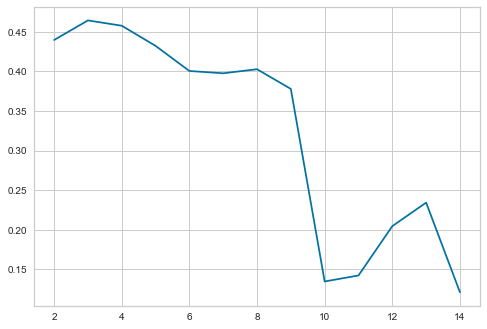

<IPython.core.display.Javascript object>

In [43]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((dfScaled_Kmeans))
    score = silhouette_score(dfScaled_Kmeans, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

* The highest Silhouette score is reached at 3, but the number is still good at 4. 6 and 10 marked two points where Silhouette significantly decreases.

* Let's see the silhouette coefficient among different clusters.

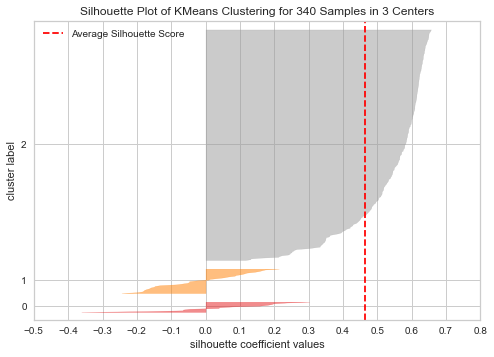

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [44]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(dfScaled_Kmeans)
visualizer.show()

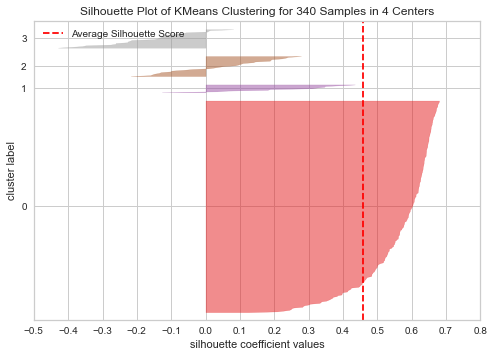

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [45]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(dfScaled_Kmeans)
visualizer.show()

* As we can expect from our exploratory analysis, there is one big cluster that has the majorit of the observations. That cluster also presents the highest sillhouette score, and makes the overall score higher. 
* If we compare the silhouette score for the other clusters, for 3 and 4 clusters, we can see that the score for the smaller clusters is a bit higher when we get 4 clusters instead of 3 (although cluster 3 has a bad score-when we have 4 clusters).
* We'll pick 4 as our optimal number of clusters.

**4 clusters- K Means Clustering**

In [46]:
# Fitting the model
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(dfScaled_Kmeans)

KMeans(n_clusters=4, random_state=1)

<IPython.core.display.Javascript object>

In [47]:
# creating a copy of our original dataset
df1 = df.copy()
# adding kmeans cluster labels to the original dataframe
df1["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [48]:
# original dataset (not scaled) with cluster number column
df1.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,3


<IPython.core.display.Javascript object>

* **Cluster Profile**

In [49]:
# Groupping entries by cluster and getting the mean value
cluster_profile = df1.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [50]:
# Counting the number of entries by cluster
cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Ticker Symbol"].count().values
)

<IPython.core.display.Javascript object>

In [51]:
# Clusters' profile - mean value for column and cluster count
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


<IPython.core.display.Javascript object>

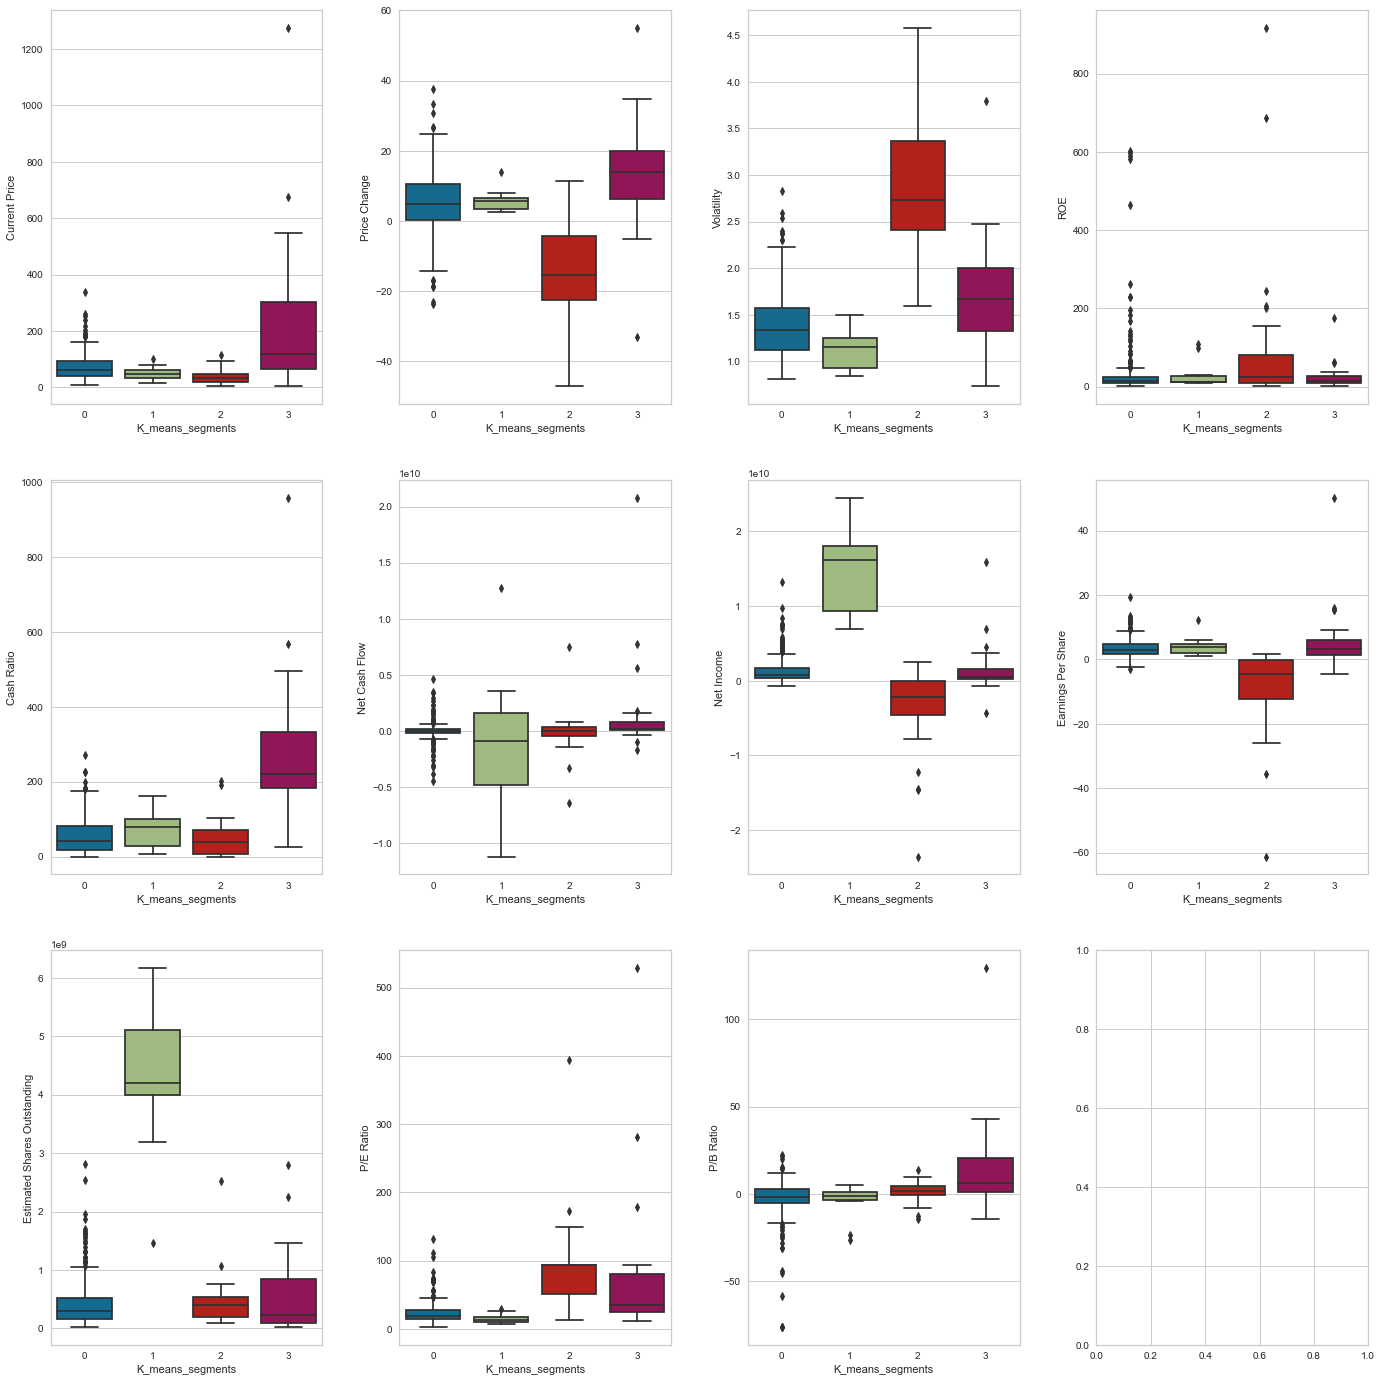

<IPython.core.display.Javascript object>

In [52]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj],
                data=df1,
                y=df1.columns[4 + counter],
                x="K_means_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

In [53]:
df1.groupby(["K_means_segments", "GICS Sector"])["Security"].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary         33
                  Consumer Staples               17
                  Energy                          6
                  Financials                     45
                  Health Care                    29
                  Industrials                    52
                  Information Technology         24
                  Materials                      19
                  Real Estate                    26
                  Telecommunications Services     2
                  Utilities                      24
1                 Consumer Discretionary          1
                  Consumer Staples                1
                  Energy                          1
                  Financials                      3
                  Health Care                     2
                  Information Technology          1
                  Telecommunications Services     2
2                 

<IPython.core.display.Javascript object>

In [54]:
# let's see the names of the companies in each cluster
for cl in df1["K_means_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["K_means_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castl

<IPython.core.display.Javascript object>

* We have 4 clusters, all of them with more than one company, which is good. But as we expected, cluster 0 groups most of the companies.

## Hierarchical Clustering

In [55]:
# Creating a copy of the scaled dataframe to use for Hierarchical clustering
dfScaled_Hier = dfScaled.copy()

<IPython.core.display.Javascript object>

In [56]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(dfScaled_Hier, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(dfScaled_Hier))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.792530720285.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correlation

<IPython.core.display.Javascript object>

In [57]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

In [58]:
# Using Euclidean distance to check for additional linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(dfScaled_Hier, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(dfScaled_Hier))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [59]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

* Avarage Linkage presents again the highest cophenetic correlation.

**Dendograms for the different linkage methods**

* Let's see how the dendograms look like for the different linkage methods, with euclidean distance.

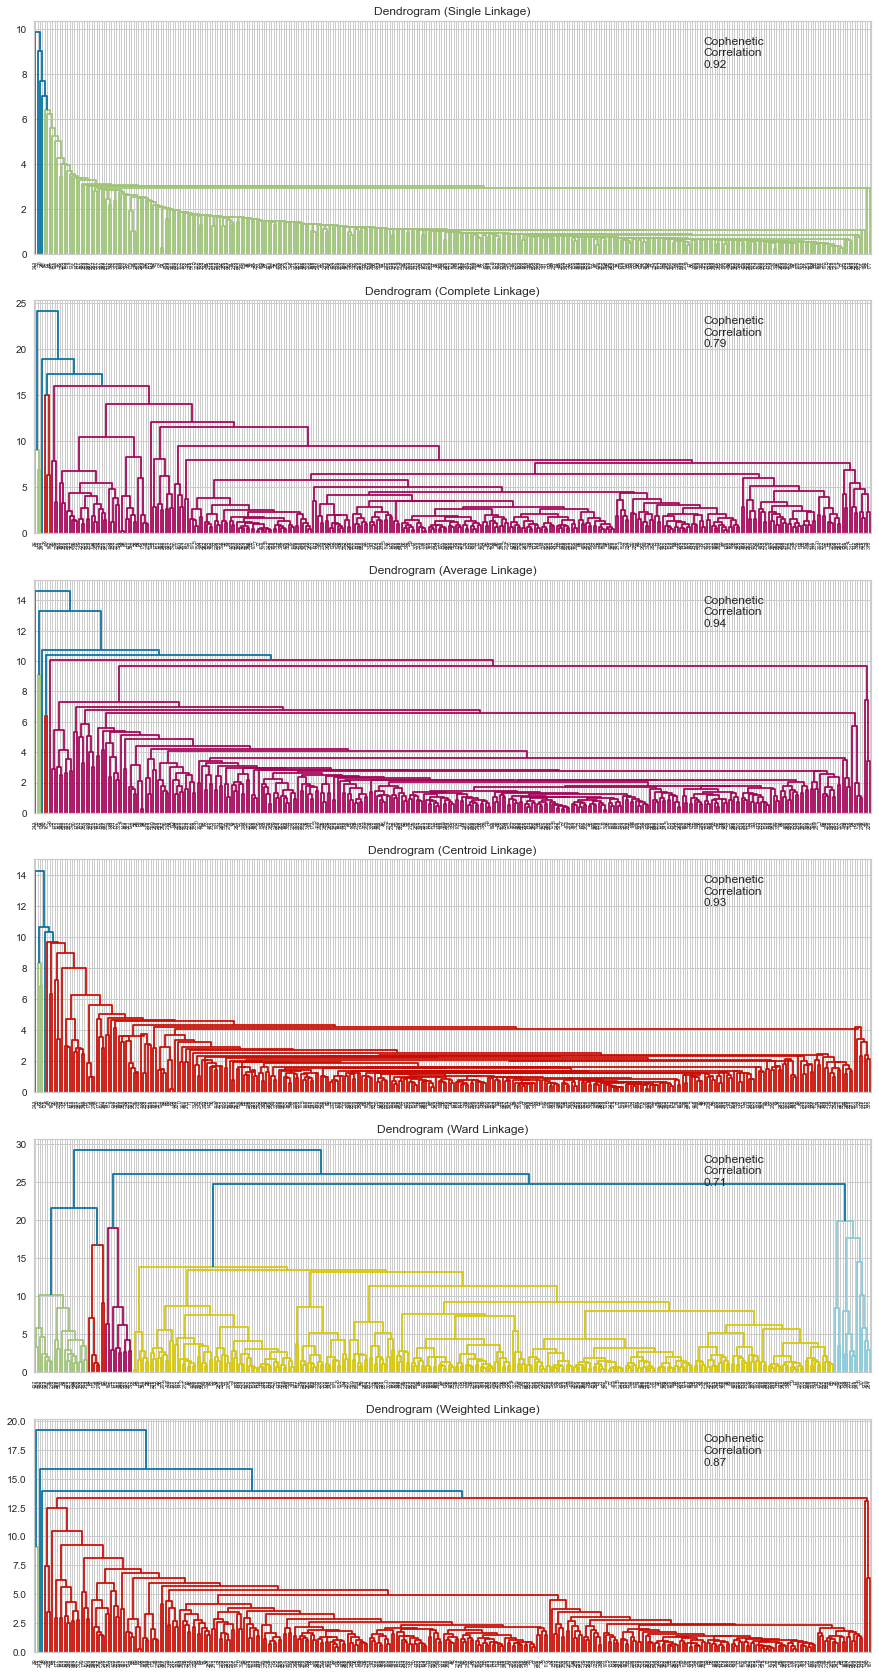

<IPython.core.display.Javascript object>

In [60]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(dfScaled_Hier, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(dfScaled_Hier))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

* The dendogram for avarage linkage, the one with the highest Cophenetic Correlation, suggests 3 clusters.

**3 Clusters- Hierarchical Clustering-**

In [61]:
# Fitting the model
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(dfScaled_Hier)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

In [62]:
# Creatting a copy of the original data to add the cluster lable
df2 = df.copy()
dfScaled_Hier["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [63]:
df2.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,0


<IPython.core.display.Javascript object>

* **Cluster Profile**

In [64]:
cluster_profile2 = df2.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [65]:
cluster_profile2["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Ticker Symbol"].count().values
)

<IPython.core.display.Javascript object>

In [66]:
# Clusters' profile - mean value for column and cluster count
cluster_profile2.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.798220,68662246.290801,1613508620.178041,2.900905,578930419.447478,32.466828,-1.739711,337
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2


<IPython.core.display.Javascript object>

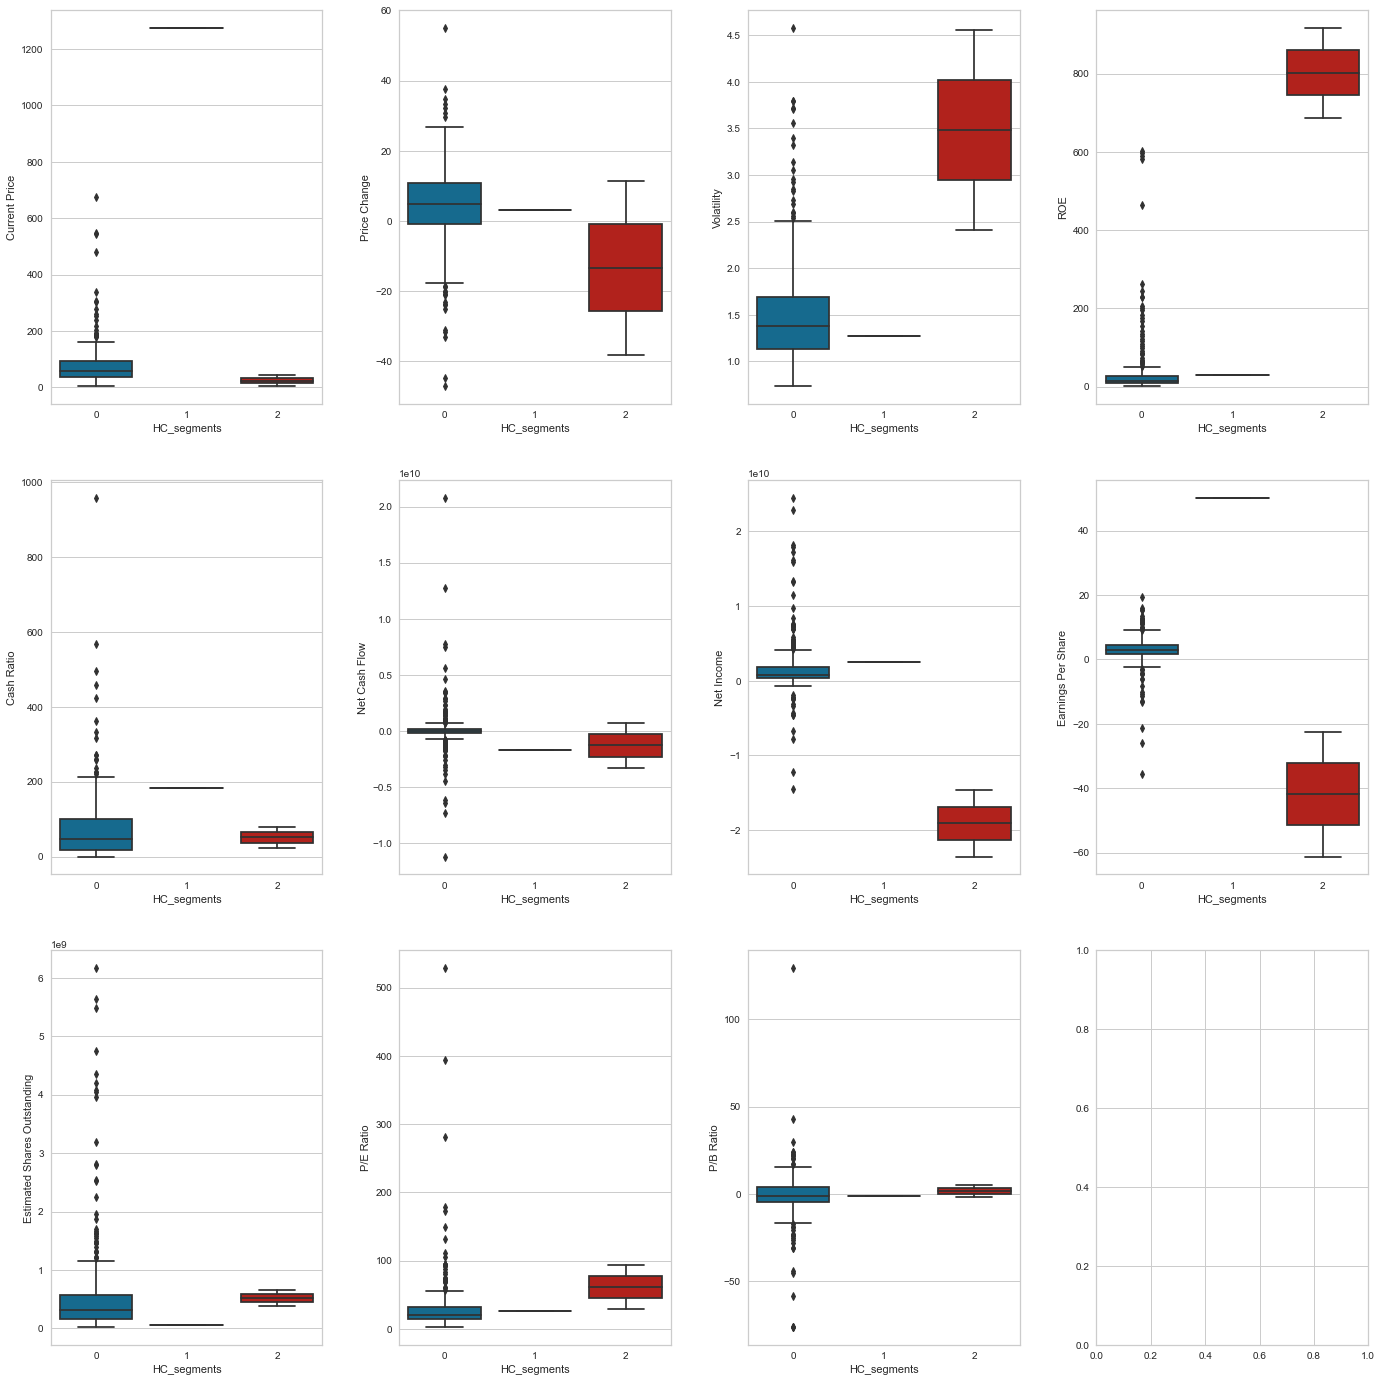

<IPython.core.display.Javascript object>

In [67]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj], data=df2, y=df2.columns[4 + counter], x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

In [68]:
df2.groupby(["HC_segments", "GICS Sector"])["Security"].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     49
             Health Care                    40
             Industrials                    53
             Information Technology         33
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          2
Name: Security, dtype: int64

<IPython.core.display.Javascript object>

In [69]:
# let's see the names of the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

<IPython.core.display.Javascript object>

* We have three clusters, but cluster 0 groups all the companies except from 3. Cluster 2 has 2 companies and cluster 1 only one. This doesn't look like a good option.

* Let't try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 5 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.

In [70]:
# Creating a copy of the scaled data
dfScaled_Hier3 = dfScaled.copy()

<IPython.core.display.Javascript object>

In [71]:
# fitting the model using ward linkage
HCmodel3 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
HCmodel3.fit(dfScaled_Hier3)

AgglomerativeClustering(n_clusters=5)

<IPython.core.display.Javascript object>

In [72]:
# making a copy of out original data set to add the tags
df3 = df.copy()
dfScaled_Hier3["HC_segments"] = HCmodel3.labels_
df3["HC_segments"] = HCmodel3.labels_

<IPython.core.display.Javascript object>

In [73]:
df3.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_segments
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,3
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,3
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,3
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,3
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,3


<IPython.core.display.Javascript object>

* **Cluster Profile**

In [74]:
cluster_profile3 = df3.groupby("HC_segments").mean()

<IPython.core.display.Javascript object>

In [75]:
cluster_profile3["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Ticker Symbol"].count().values
)

<IPython.core.display.Javascript object>

In [76]:
# Clusters' profile - mean value for column and cluster count
cluster_profile3.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
HC_segments,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22


<IPython.core.display.Javascript object>

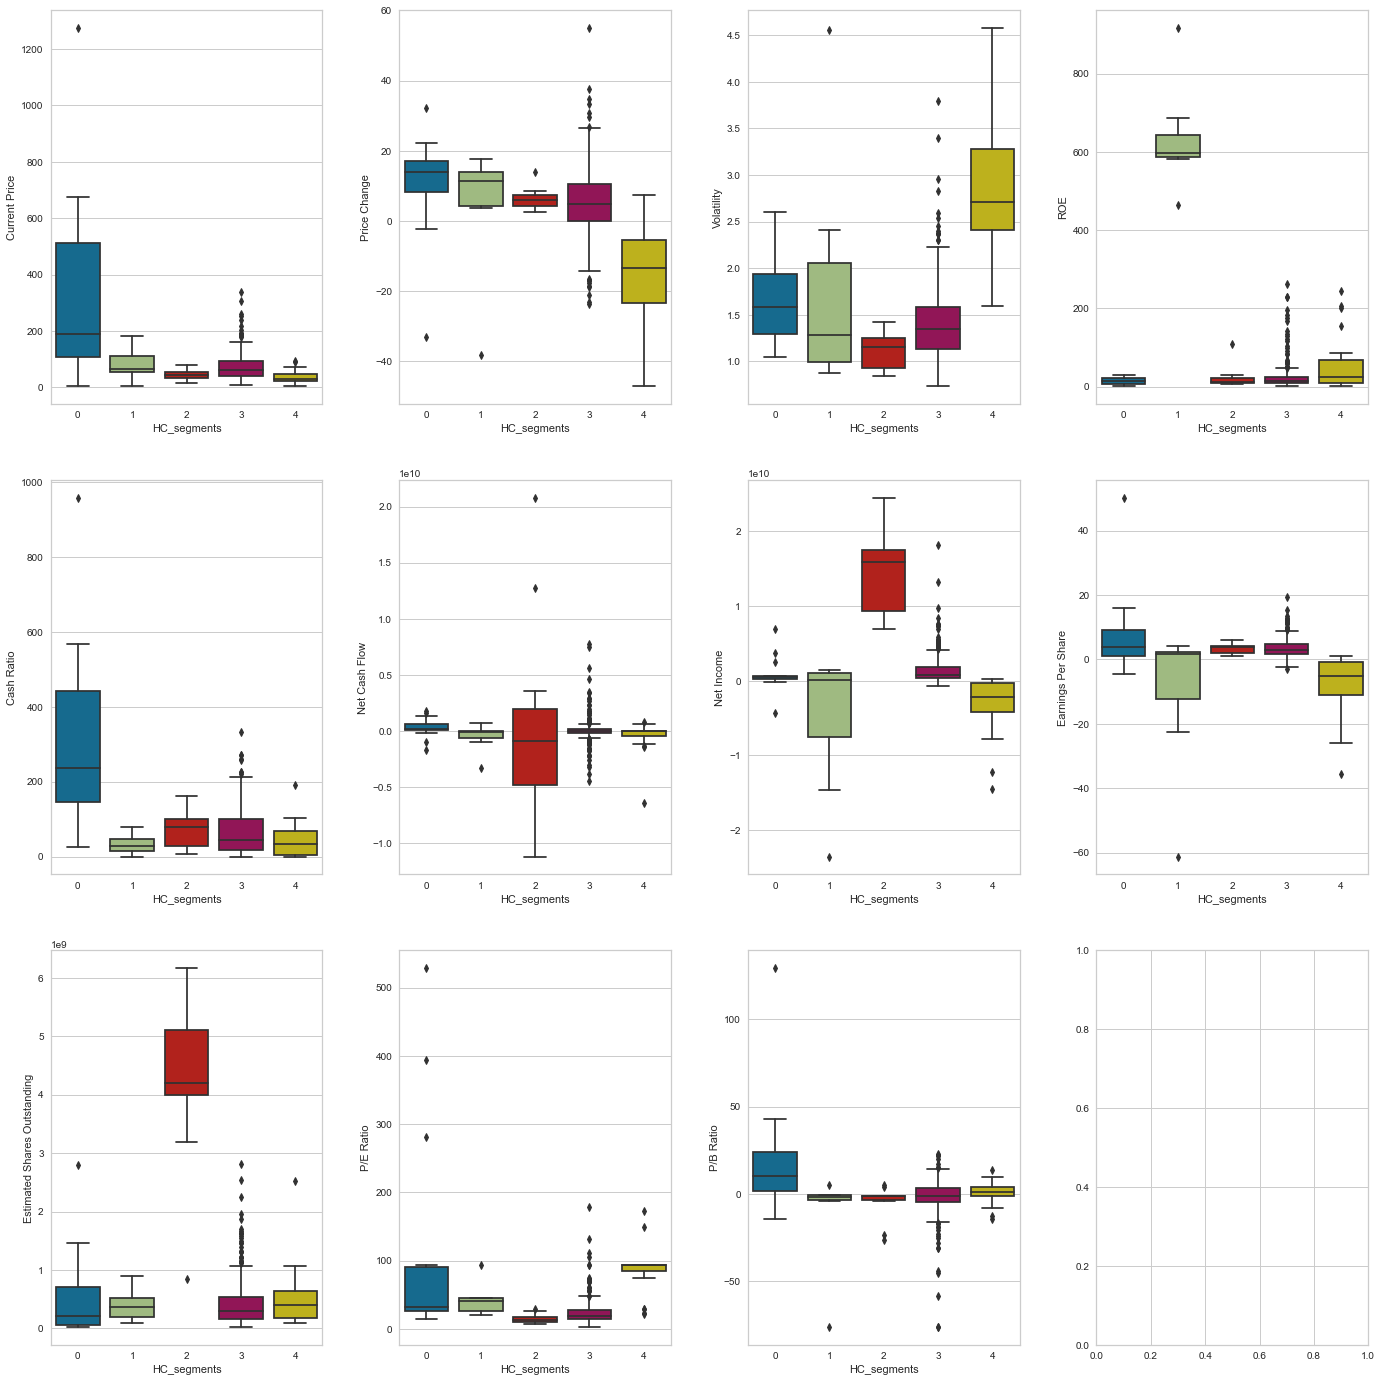

<IPython.core.display.Javascript object>

In [77]:
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
counter = 0

for ii in range(3):
    for jj in range(4):
        if counter < 11:
            sns.boxplot(
                ax=axes[ii][jj], data=df3, y=df3.columns[4 + counter], x="HC_segments",
            )
            counter = counter + 1

fig.tight_layout(pad=3.0)

In [78]:
df3.groupby(["HC_segments", "GICS Sector"])["Security"].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy

<IPython.core.display.Javascript object>

In [79]:
# let's see the names of the companies in each cluster
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

<IPython.core.display.Javascript object>

* Using Ward linkage gave us better results. We've crated 4 clusters with more than one company in each cluster. Again, there is one cluster, in this case number 3, that is way bigger than the others.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

* Both clustering techniques gave us different but comparable results.
* Executing K-means clustering was more time-consuming since finding the correct number of clusters was quite difficult. On the other hand, the dendogram helped to make that job easier in the case of Hierarchical clustering. Nonethe less, Hierarchical clustering also didn't give a good result in the first try.
* Creating distintc cluster was challenging in both models. It might be necessary to perform futher manipulation of the dataset to obtain better results in this regards. K-means with 4 clusters, and Hierarchical clustering with 5 clusters and using ward linkage gave both acceptable results. In contrast, Hierarchical clustering with avarge linkage didn't.
* Both algoriths created one cluster way bigger than the others. In the case of K-means that cluster (number 0) has 277 observations, and in the case of Hierarchical clustering 285 (the cluster number is 3).
* The appropiate number of clusters for K-means turned out to be 4, and for Hierarchical clustering 5.
* In both clustering techniques, the bigest cluster groups all industrial companies but one. And we know from our previous analysis that this is the sector with the highest number of observations. 
* If we observe the box plots, there are some variables where the distinctions among clusters is more clear. For K-means, Price Change, Volatility and Net Income present more distinctintions among clusters, for Hierarchical clustering the two most distinct variables seem to be Price Change and Net Income.

## Actionable Insights and Recommendations

- We'll use Hierarchical Clustering results to provide actionables insights and recommendations. 
- **Cluster 0**
   - There are 15 companies in this cluster.
   - This cluster groups the companies with the highest avarage performance in terms of Current Price, positive Price Change, Cash Ratio, P/E Ratio, P/B Ratio and Earnings Per Share.
   - Most of the companies in the cluster are from the Health Care, Information Technoloy, and Consumer Discretionary sectors.
- **Cluster 1**
   - There are 7 companies in this cluster.
   - In avarage, the companies in this cluster present the highest ROE, which is a good indicator of financial performance, but both negative Net Cash Flow and Net Income, and also negative Earnings Per Share and P/B Ratio.
   - The two sector with more representation in this cluster are Energy and Consumer Staples.
- **Cluster 2**
   - There are 11 companies in this cluster.
   - These companies have, in avarage, the highest Net Cash Flow, Net Income and Estimated Shares Outstanding, but a negative P/B Ratio.
   - Finance is the sector with more representation in the cluster.
- **Cluster 3**
   - There are 285 companies in this cluster.
   - The biggest cluster doesn't present the highest avarage value of any variable. All values are positive in avarage except from P/B Ratio, which is negative but not the lower in avarage either.
   - This cluster is mainly formed by Industrial, Financial, and Health Care industries.
- **Cluster 4**
   - There are 26 companies in this cluster.
   - This cluster groups companies with a high avarage Volatility, and the highest negaive avarage price change. Net cash Flow and Net Income are also negative in avarage.
   - Energy is the main economic sector in the cluster.

**Recommendations**: 
- Cluster 0 companies present the best investing portfolio with the highest Earning Per Share, and no indicators of unhelathy financial state. But there are only 15 companies in this group. 
- Cluster 2 also looks like a good investing option, with a high Net Cash Flow and Net Income will be able to respond to any ogligatons, but the P/B ratio is negative.
- Cluster 3 presents a wide variety of companies to invest in, with not outstanding indicators but good performance in general.
- Clusters 1 and 4 are the most risky choices.